[[ 92.    91.    91.   ...  61.5    0.     0.  ]
 [ 91.    90.75  90.5  ...  30.75   0.     0.  ]
 [ 91.    91.    90.   ...  59.     0.     0.  ]
 ...
 [174.5  176.25 178.   ...  48.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]
 [  0.     0.     0.   ...   0.     0.     0.  ]]


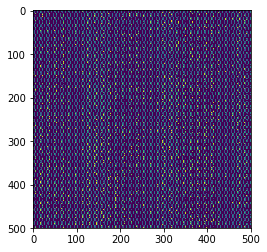

In [1]:
from PIL import Image
import numpy as np
from matplotlib.pyplot import imshow

%matplotlib inline


img = Image.open("5.jpg", 'r')
img = img.convert('L') # преобразование в изображение в оттенках серого

# imshow(np.asarray(img))

im_array = np.asarray(img)
# img.save("5_resize.jpg")

pix = img.load() # выгрузка значений пикселов
height, width = im_array.shape

result_arr = np.empty((500, 500)) # создание нового массива

for x in range(height-1):
	for y in range(width-1):
		result_arr[2*x, 2*y] = pix[x,y]
		result_arr[2*x, 2*y+1] = pix[x,y] * ((2*y+2)-(2*y+1))/((2*y+2)-2*y) + \
		                         pix[x+1, y+1] * ((2*y+1)-2*y)/((2*y+2)-2*y)
		result_arr[2*x+1, 2*y] = pix[x,y] * ((2*x+2)-(2*x+1))/((2*x+2)-2*x) + \
		                         pix[x+1, y+1] * ((2*x+1)-2*x)/((2*x+2)-2*x)

	for y in range(width-1):
		result_arr[2*x+1, 2*y+1] = result_arr[2*x+1, 2*y] * ((2*y+2)-(2*y+1))/((2*y+2)-2*y) + \
		                           result_arr[2*x+1, 2*y+2] * ((2*y+1)-2*y)/((2*y+2)-2*y)
		# result_arr[(2*x)+1, (2*y)+0] = (pix[x+1, y] + pix[x,y]) / 2
		# result_arr[(2*x)+0, (2*y)+1] = (pix[x, y+1] + pix[x,y]) / 2
		# result_arr[(2*x)+1, (2*y)+1] = (pix[x+1, y+1] + pix[x+1, y] + pix[x, y+1] + pix[x,y]) / 4
print(result_arr)

result_img = Image.fromarray(result_arr, mode = 'L')
imshow(np.asarray(result_img)) # преобразованная картинка
# result_img.save("5_resize.jpg")